# Can you make the image smile again?

In [1]:
import numpy as np
import pandas as pd
import pylab as pl

In [5]:
full_df = pd.read_csv('../dataset/full.csv')
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')

# Here is the original image

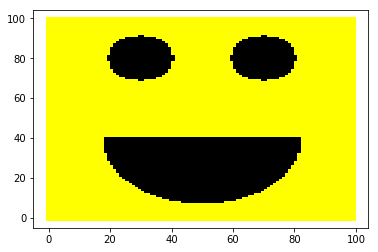

In [6]:
for color in ['yellow', 'black']:
    pl.scatter(full_df[full_df.color==color].x, full_df[full_df.color==color].y, c=color, marker=',', edgecolors='none')
pl.show()

# But I've lost some data from the image :(

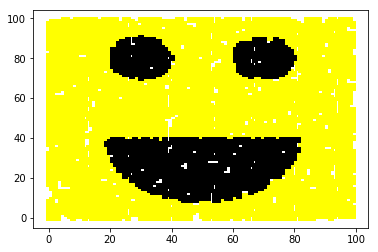

In [7]:
for color in ['yellow', 'black']:
    pl.scatter(train_df[train_df.color==color].x, train_df[train_df.color==color].y, c=color, marker=',', edgecolors='none')
pl.show()

# Can you help me recover my original image?

In [8]:
# hint: what kind of problem is this? regression/classification/clustering
train_df.head()

,x,y,color
0,24,81,black
1,27,92,yellow
2,41,83,yellow
3,66,27,black
4,89,85,yellow


In [9]:
#convert target variables to 0's and 1's
model_data = pd.get_dummies(train_df, columns=['color'], drop_first=True)
model_data.head()

,x,y,color_yellow
0,24,81,0
1,27,92,1
2,41,83,1
3,66,27,0
4,89,85,1


In [10]:
#define model
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance') #model initialized
knn.fit(train_df[['x', 'y']], model_data['color_yellow'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [12]:
#make predictions
myoutput = knn.predict(X=test_df[['x', 'y']])

In [13]:
test_df['color'] = myoutput
mydict = {0: 'black', 1: 'yellow'}
test_df['color'] = test_df.color.map(mydict)

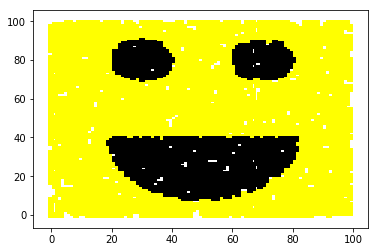

In [14]:
for color in ['yellow', 'black']:
    pl.scatter(train_df[train_df.color==color].x, train_df[train_df.color==color].y, c=color, marker=',', edgecolors='none')
for color in ['yellow', 'black']:
    pl.scatter(train_df[train_df.color==color].x, train_df[train_df.color==color].y, c=color, marker=',', edgecolors='none')
pl.show()